### Import Dependencies

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
import numpy as np 
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix, classification_report
import itertools

2023-07-16 20:46:43.555494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-16 20:46:43.555571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load Fashion_mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

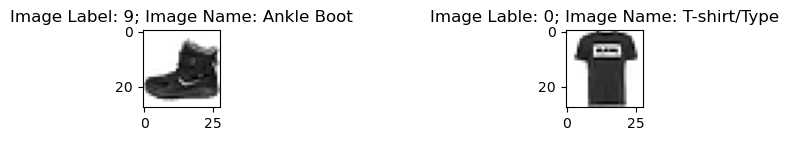

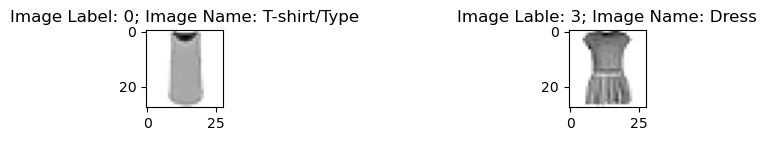

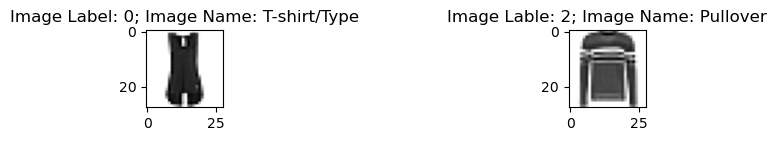

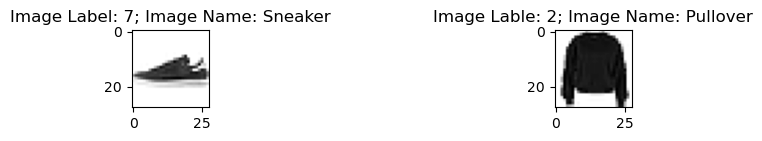

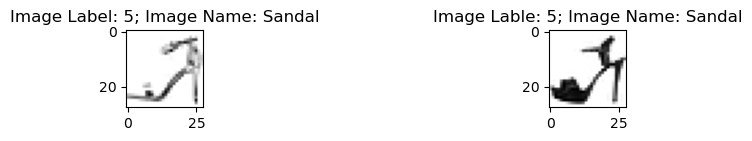

In [3]:
names = {0: "T-shirt/Type", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

for i in range(0, 10, 2):
    plt.figure(figsize=[10, 1])
    plt.subplot(1, 2, 1)
    plt.imshow(x_train[i,:,:], cmap="gray_r")
    plt.title("Image Label: {}; Image Name: {}".format(y_train[i], names[y_train[i]]))
    plt.subplot(1, 2, 2)
    plt.imshow(x_train[i+1, :, :], cmap="gray_r")
    plt.title("Image Lable: {}; Image Name: {}".format(y_train[i+1], names[y_train[i+1]]))

In [4]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # (60000, 784)
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) # (10000, 784)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalization
x_train /= 255
x_test /= 255

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # Hidden Layer 1
model.add(Dense(512, activation='relu')) # Hidden Layer 2
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

2023-07-16 20:51:20.676842: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
187/188 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.8055

2023-07-16 20:51:35.837070: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37632000 exceeds 10% of free system memory.


188/188 [==============================] - 17s 83ms/step - loss: 0.0279 - accuracy: 0.8056 - val_loss: 0.0214 - val_accuracy: 0.8550
Epoch 2/10
188/188 [==============================] - 11s 61ms/step - loss: 0.0196 - accuracy: 0.8650 - val_loss: 0.0194 - val_accuracy: 0.8683
Epoch 3/10
188/188 [==============================] - 12s 65ms/step - loss: 0.0180 - accuracy: 0.8765 - val_loss: 0.0189 - val_accuracy: 0.8705
Epoch 4/10
188/188 [==============================] - 13s 68ms/step - loss: 0.0167 - accuracy: 0.8863 - val_loss: 0.0179 - val_accuracy: 0.8784
Epoch 5/10
188/188 [==============================] - 11s 60ms/step - loss: 0.0159 - accuracy: 0.8916 - val_loss: 0.0167 - val_accuracy: 0.8822
Epoch 6/10
188/188 [==============================] - 12s 64ms/step - loss: 0.0151 - accuracy: 0.8977 - val_loss: 0.0167 - val_accuracy: 0.8852
Epoch 7/10
188/188 [==============================] - 12s 62ms/step - loss: 0.0143 - accuracy: 0.9033 - val_loss: 0.0166 - val_accuracy: 0.8873
Epo

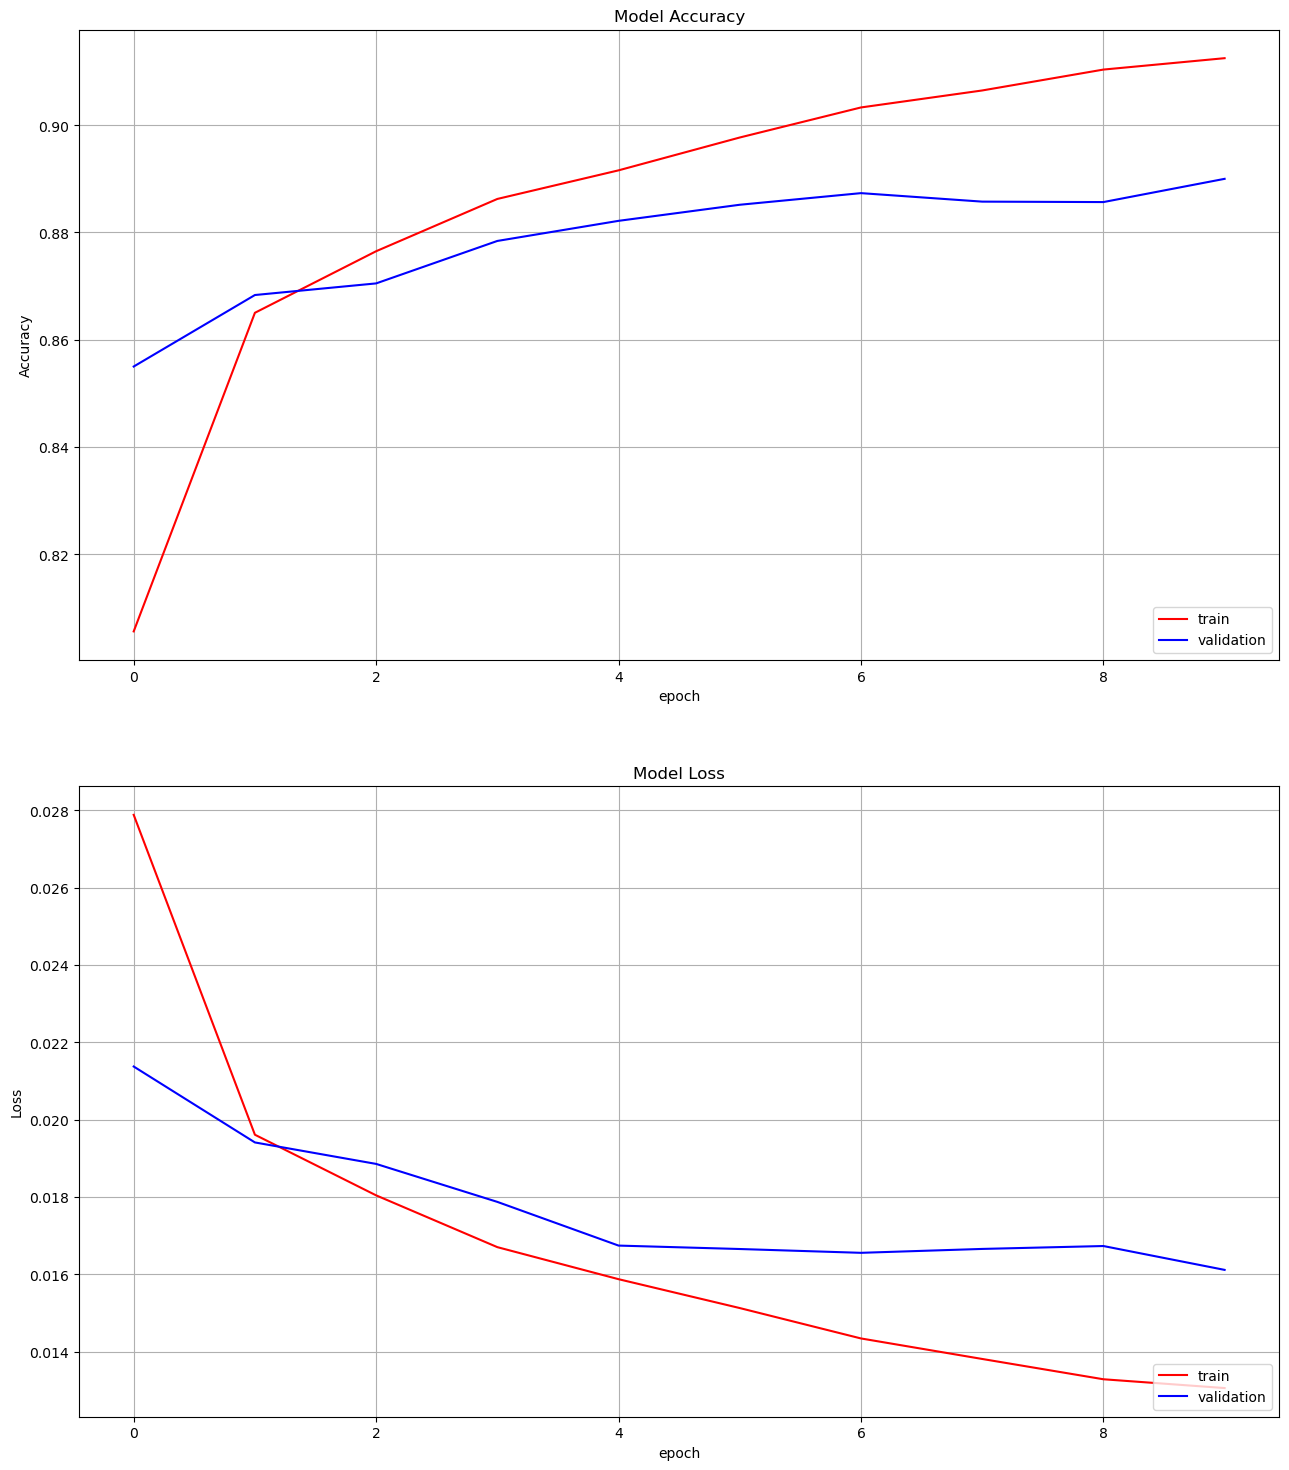

In [10]:
fig = plt.figure()
fig.subplots_adjust(right=2, top=3)
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.subplot(2,1,2)
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

In [13]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)

[test_loss, test_accuracy] = model.evaluate(x_test, y_test)
print("Test loss: ", test_loss)
print("Test accuracy: ", test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.0172 - accuracy: 0.8820
Test loss:  0.017180094495415688
Test accuracy:  0.8820000290870667


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.84      0.80      1000
           3       0.84      0.91      0.88      1000
           4       0.83      0.77      0.79      1000
           5       0.95      0.97      0.96      1000
           6       0.74      0.66      0.70      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



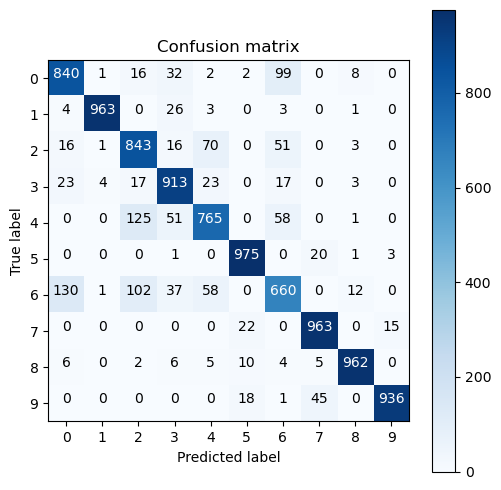

In [14]:
y_test = np.argmax(y_test, axis=1)
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
confusion_mtx = confusion_matrix(y_test, y_prediction) 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx, class_names)    

print(classification_report(y_test,y_prediction))